In [1]:
!pip install prophet
!pip install --upgrade prophet

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [3]:
import plotly as py

In [4]:
data = pd.read_csv('Electric_Consumption_And_Cost__2010_-_Feb_2023__20231219.csv')
data.head()

C:\Users\saich\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,15396.82,GOV/NYC/068,Yes,128800.0,7387.97,216.0,2808.0,5200.85
1,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14556.34,GOV/NYC/068,Yes,115200.0,6607.87,224.0,2912.0,5036.47
2,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13904.98,GOV/NYC/068,Yes,103200.0,5919.55,216.0,2808.0,5177.43
3,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14764.04,GOV/NYC/068,Yes,105600.0,6057.22,208.0,2704.0,6002.82
4,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13729.54,GOV/NYC/068,Yes,97600.0,5598.34,216.0,2808.0,5323.20


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447849 entries, 0 to 447848
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Development Name    446368 non-null  object 
 1   Borough             447849 non-null  object 
 2   Account Name        447849 non-null  object 
 3   Location            436128 non-null  object 
 4   Meter AMR           447622 non-null  object 
 5   Meter Scope         23867 non-null   object 
 6   TDS #               445111 non-null  float64
 7   EDP                 447849 non-null  int64  
 8   RC Code             447849 non-null  object 
 9   Funding Source      447849 non-null  object 
 10  AMP #               445962 non-null  object 
 11  Vendor Name         447849 non-null  object 
 12  UMIS BILL ID        447849 non-null  int64  
 13  Revenue Month       447849 non-null  object 
 14  Service Start Date  447841 non-null  object 
 15  Service End Date    447841 non-nul

In [6]:
data.shape

(447849, 27)

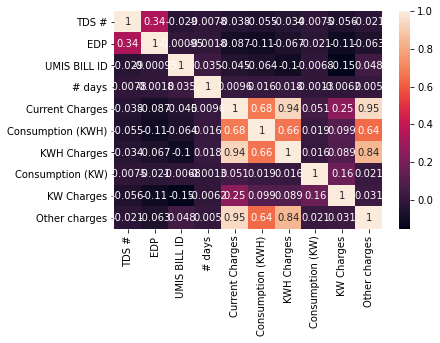

In [7]:
numeric_data = data.select_dtypes(include='number')
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()



In [8]:
print(data.columns)


Index(['Development Name', 'Borough', 'Account Name', 'Location', 'Meter AMR',
       'Meter Scope', 'TDS #', 'EDP', 'RC Code', 'Funding Source', 'AMP #',
       'Vendor Name', 'UMIS BILL ID', 'Revenue Month', 'Service Start Date',
       'Service End Date', '# days', 'Meter Number', 'Estimated',
       'Current Charges', 'Rate Class', 'Bill Analyzed', 'Consumption (KWH)',
       'KWH Charges', 'Consumption (KW)', 'KW Charges', 'Other charges'],
      dtype='object')


In [9]:
df = data[['Service Start Date', '# days', 'Service End Date', 'Consumption (KWH)']]


In [10]:
df

,Service Start Date,# days,Service End Date,Consumption (KWH)
0,12/24/2009,33.0,01/26/2010,128800.0
1,01/26/2010,30.0,02/25/2010,115200.0
2,02/25/2010,29.0,03/26/2010,103200.0
3,03/26/2010,31.0,04/26/2010,105600.0
4,04/26/2010,28.0,05/24/2010,97600.0
...,...,...,...,...
447844,12/23/2022,33.0,01/25/2023,0.0
447845,12/23/2022,33.0,01/25/2023,0.0
447846,12/23/2022,33.0,01/25/2023,82800.0
447847,12/23/2022,33.0,01/25/2023,90400.0


In [11]:
df.isnull().sum()

Service Start Date    8
# days                8
Service End Date      8
Consumption (KWH)     0
dtype: int64

In [12]:
df.dropna(inplace=True)


<ipython-input-12-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [13]:
df.isnull().sum()

Service Start Date    0
# days                0
Service End Date      0
Consumption (KWH)     0
dtype: int64

In [14]:
df.shape

(447841, 4)

In [15]:
#converting the date fields from object to datetime dtype
df['Service Start Date']= pd.to_datetime(df['Service Start Date'])
df['Service End Date'] = pd.to_datetime(df['Service End Date'])

<ipython-input-15-903f31621ccb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Service Start Date']= pd.to_datetime(df['Service Start Date'])
<ipython-input-15-903f31621ccb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Service End Date'] = pd.to_datetime(df['Service End Date'])


In [16]:
df.dtypes

Service Start Date    datetime64[ns]
# days                       float64
Service End Date      datetime64[ns]
Consumption (KWH)            float64
dtype: object

In [17]:
#Finding outliers in #days and deleting those records from the data

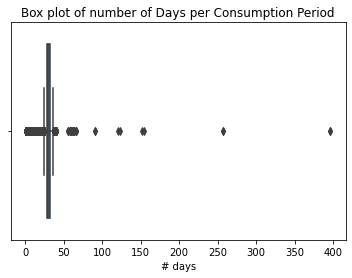

In [18]:
sns.boxplot(x=data['# days'])
plt.title('Box plot of number of Days per Consumption Period')
plt.show()

In [19]:
# Identify the rows where '# days' is less than 20 or greater than 33
outlier_rows = df[(df['# days'] < 28) | (df['# days'] > 33)].index

In [20]:
#drop these rows from the dataframe
data_cleaned = df.drop(outlier_rows)

In [21]:
#calculate daily consumption
data_cleaned['Daily Consumption'] = data_cleaned['Consumption (KWH)'] / data_cleaned['# days']

In [22]:
#create a daily date range for each record 
data_cleaned['Date Range'] = data_cleaned.apply(lambda row: pd.date_range(row['Service Start Date'], row['Service End Date']), axis=1)

In [23]:
#explode the data frame to have a row for each day
daily_data = data_cleaned.explode('Date Range')

In [24]:
# Rename and select relevant columns
daily_data = daily_data.rename(columns={'Date Range': 'Each Date'})[['Each Date', 'Daily Consumption']]

In [25]:
#display the new dataframe
print(daily_data)

        Each Date  Daily Consumption
0      2009-12-24        3903.030303
0      2009-12-25        3903.030303
0      2009-12-26        3903.030303
0      2009-12-27        3903.030303
0      2009-12-28        3903.030303
...           ...                ...
447848 2023-01-21        2981.818182
447848 2023-01-22        2981.818182
447848 2023-01-23        2981.818182
447848 2023-01-24        2981.818182
447848 2023-01-25        2981.818182

[13813487 rows x 2 columns]


In [26]:
daily_data['Each Date'].max()

Timestamp('2023-01-30 00:00:00')

In [27]:
daily_data['Each Date'].value_counts()

2020-03-25    13512
2020-02-25    13470
2020-01-24    13443
2021-02-25    10180
2021-12-23    10170
              ...  
2018-01-04        1
2010-12-30        1
2018-01-09        1
2018-01-01        1
2011-01-05        1
Name: Each Date, Length: 4095, dtype: int64

In [28]:
#create the daily dataset
daily_data_sum = daily_data.groupby('Each Date')['Daily Consumption'].sum()
daily_data_sum = pd.DataFrame(daily_data_sum)
daily_data_sum

,Daily Consumption
Each Date,
2009-12-24,3.146217e+06
2009-12-25,3.146217e+06
2009-12-26,3.146217e+06
2009-12-27,3.146217e+06
2009-12-28,3.146217e+06
...,...
2023-01-26,2.491283e+04
2023-01-27,4.507500e+03
2023-01-28,4.507500e+03


<AxesSubplot:xlabel='Each Date'>

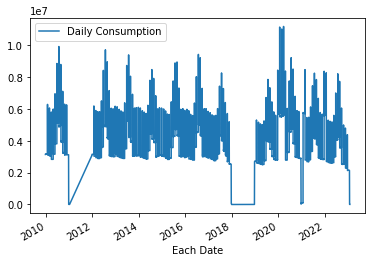

In [29]:
daily_data_sum.plot()

In [30]:
daily_data_sum.reset_index(inplace=True)

In [31]:
daily_data_sum = daily_data_sum.rename(columns={'Each Date':'Service Start Date','Daily Consumption':'Consumption(KWH)'})

In [32]:
#creating daily data set with numeric features
# df = df.rename(columns={'Service Start Date':'ds','Consumption(KWH)':'y'})
df = daily_data_sum.rename(columns={'Each Date': 'Service Start Date', 'Daily Consumption':'Consumption(KWH)'})

In [33]:
df

,Service Start Date,Consumption(KWH)
0,2009-12-24,3.146217e+06
1,2009-12-25,3.146217e+06
2,2009-12-26,3.146217e+06
3,2009-12-27,3.146217e+06
4,2009-12-28,3.146217e+06
...,...,...
4090,2023-01-26,2.491283e+04
4091,2023-01-27,4.507500e+03
4092,2023-01-28,4.507500e+03
4093,2023-01-29,4.507500e+03


In [34]:
#creating dataset for adding external factor
df_temp = daily_data_sum.rename(columns={'Each Date': 'Service Start Date','Daily Consumption':'Consumption (KWH)'})
df_temp

,Service Start Date,Consumption(KWH)
0,2009-12-24,3.146217e+06
1,2009-12-25,3.146217e+06
2,2009-12-26,3.146217e+06
3,2009-12-27,3.146217e+06
4,2009-12-28,3.146217e+06
...,...,...
4090,2023-01-26,2.491283e+04
4091,2023-01-27,4.507500e+03
4092,2023-01-28,4.507500e+03
4093,2023-01-29,4.507500e+03


In [35]:
daily_data_sum.set_index('Service Start Date', inplace = True)

In [36]:
#creating Monthly Dataset
#group by month and calculate the sum
monthly_data = daily_data_sum.resample('M').sum()

In [37]:
#format the index to keep only the year and month
monthly_data.index = monthly_data.index.strftime('%Y-%m')

<AxesSubplot:xlabel='Service Start Date'>

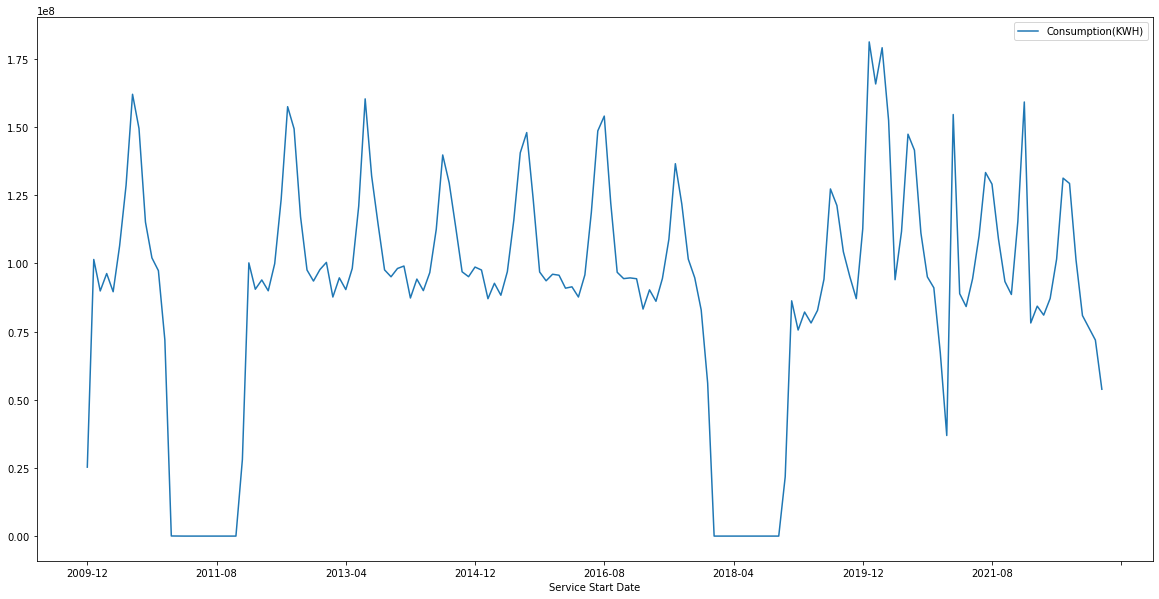

In [38]:
monthly_data.plot(figsize=(20,10))

In [39]:
monthly_data

,Consumption(KWH)
Service Start Date,
2009-12,2.528582e+07
2010-01,1.014641e+08
2010-02,8.991616e+07
2010-03,9.630300e+07
2010-04,8.962818e+07
...,...
2022-09,1.013543e+08
2022-10,8.089626e+07
2022-11,7.643075e+07


In [40]:
#creating Yearly Dataset
#group by year and calculate the sum
yearly_data = daily_data_sum.resample('A').sum()

In [41]:
#format the index to keep only the year
yearly_data.index = yearly_data.index.strftime('%Y')

In [42]:
yearly_data

,Consumption(KWH)
Service Start Date,
2009,2.528582e+07
2010,1.310643e+09
2011,2.815219e+07
2012,1.311111e+09
2013,1.290197e+09
2014,1.253506e+09
2015,1.277355e+09
2016,1.291163e+09
2017,1.151283e+09


<AxesSubplot:xlabel='Service Start Date'>

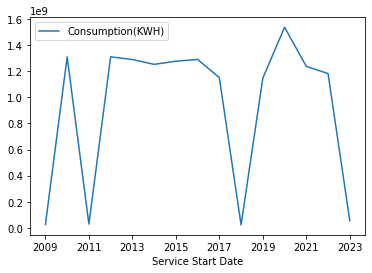

In [43]:
yearly_data.plot()

In [44]:
daily_data_sum

,Consumption(KWH)
Service Start Date,
2009-12-24,3.146217e+06
2009-12-25,3.146217e+06
2009-12-26,3.146217e+06
2009-12-27,3.146217e+06
2009-12-28,3.146217e+06
...,...
2023-01-26,2.491283e+04
2023-01-27,4.507500e+03
2023-01-28,4.507500e+03


In [45]:
# Display the column names
print(daily_data_sum.columns)

Index(['Consumption(KWH)'], dtype='object')


In [46]:
#ADDING LAG FEATURE TO SEE HOW A PREVIOUS CONSUMPTION VALUE AFFECTS THE NEXT DAY'S CONSUMPTION AS HAVING NOTHING TO CORRELATE LEADS IN A STRAIGHT LINE WITH NO CHANGE
daily_data_sum['Consumption_Lag1'] = daily_data_sum['Consumption(KWH)'].shift(1)

In [47]:
daily_data_sum

,Consumption(KWH),Consumption_Lag1
Service Start Date,,
2009-12-24,3.146217e+06,NaN
2009-12-25,3.146217e+06,3.146217e+06
2009-12-26,3.146217e+06,3.146217e+06
2009-12-27,3.146217e+06,3.146217e+06
2009-12-28,3.146217e+06,3.146217e+06
...,...,...
2023-01-26,2.491283e+04,2.140346e+06
2023-01-27,4.507500e+03,2.491283e+04
2023-01-28,4.507500e+03,4.507500e+03


In [48]:
#dropping the first row if it still contains NaN after filling

In [49]:
daily_data_sum.dropna(inplace = True)

In [50]:
#dropping the service start date column as xgboost models dont support data types other than bool, int, float, category

In [51]:
daily_data_sum.reset_index(inplace = True)

In [52]:
daily_data_sum.drop('Service Start Date',inplace = True,axis = 1)

In [53]:
daily_data_sum

,Consumption(KWH),Consumption_Lag1
0,3.146217e+06,3.146217e+06
1,3.146217e+06,3.146217e+06
2,3.146217e+06,3.146217e+06
3,3.146217e+06,3.146217e+06
4,3.184909e+06,3.146217e+06
...,...,...
4089,2.491283e+04,2.140346e+06
4090,4.507500e+03,2.491283e+04
4091,4.507500e+03,4.507500e+03
4092,4.507500e+03,4.507500e+03


In [54]:
daily_data_sum.reset_index(inplace = True)

In [55]:
daily_data_sum


,index,Consumption(KWH),Consumption_Lag1
0,0,3.146217e+06,3.146217e+06
1,1,3.146217e+06,3.146217e+06
2,2,3.146217e+06,3.146217e+06
3,3,3.146217e+06,3.146217e+06
4,4,3.184909e+06,3.146217e+06
...,...,...,...
4089,4089,2.491283e+04,2.140346e+06
4090,4090,4.507500e+03,2.491283e+04
4091,4091,4.507500e+03,4.507500e+03
4092,4092,4.507500e+03,4.507500e+03


In [56]:
#define the train and test sets
train = daily_data_sum[:-3065]
test = daily_data_sum[-3065:]

X_train = train.drop('Consumption(KWH)', axis = 1)
y_train = train['Consumption(KWH)']

X_test = test.drop('Consumption(KWH)', axis = 1)
y_test = test['Consumption(KWH)']

Mean absolute Error: 193843.49113527246
Mean absolute percentage Error: 4.8134300269168975%
Mean absolute Error: 504903.78928632004
Mean absolute percentage Error: 15.567917900457784%
Mean absolute Error: 792485.1185992777
Mean absolute percentage Error: 22.025753961582865%


C:\Users\saich\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\saich\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


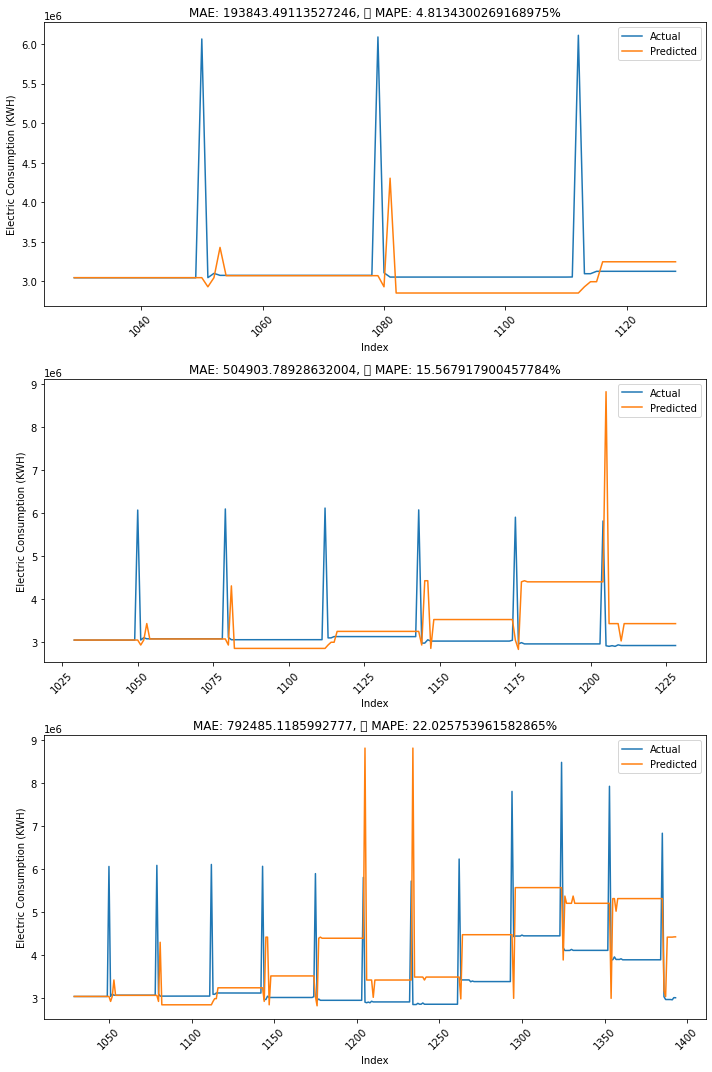

In [57]:
from xgboost import XGBRegressor
periods = [100, 200, 365]
fig, axes = plt.subplots(3, 1, figsize=(10, 15)) # Adjust figure size as needed
for i, period in enumerate(periods):
    model = XGBRegressor(n_estimators=100) 
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test [:period], predictions[:period])
    mape = np.mean (np.abs ((y_test[:period] - predictions [:period]) / y_test)) * 100 
    print(f"Mean absolute Error: {mae}")
    print(f"Mean absolute percentage Error: {mape}%")
  # Plotting the actual and predicted values
    axes[i].plot(X_test['index'] [:period], y_test[:period], label='Actual') 
    axes[i].plot(X_test['index'] [:period], predictions [:period], label='Predicted')
# Set titles and labels
    axes[i].set_title(f"MAE: {mae}, \t MAPE: {mape}%")
    axes [i].set_xlabel('Index')
    axes [i].set_ylabel('Electric Consumption (KWH)')
    axes[i].tick_params (axis='x', rotation=45) # Rotate x-axis labels 
    axes [i].legend()
    
mae1 = mae
mape1 = mape
plt.tight_layout() # Adjust the layout
plt.show()

In [58]:
#creating lag for monthly dataset

In [59]:
monthly_data['Consumption_lag1'] = monthly_data['Consumption(KWH)'].shift(1)

In [60]:
monthly_data

,Consumption(KWH),Consumption_lag1
Service Start Date,,
2009-12,2.528582e+07,NaN
2010-01,1.014641e+08,2.528582e+07
2010-02,8.991616e+07,1.014641e+08
2010-03,9.630300e+07,8.991616e+07
2010-04,8.962818e+07,9.630300e+07
...,...,...
2022-09,1.013543e+08,1.293409e+08
2022-10,8.089626e+07,1.013543e+08
2022-11,7.643075e+07,8.089626e+07


In [61]:
monthly_data.dropna(inplace = True)

In [62]:
monthly_data

,Consumption(KWH),Consumption_lag1
Service Start Date,,
2010-01,1.014641e+08,2.528582e+07
2010-02,8.991616e+07,1.014641e+08
2010-03,9.630300e+07,8.991616e+07
2010-04,8.962818e+07,9.630300e+07
2010-05,1.064781e+08,8.962818e+07
...,...,...
2022-09,1.013543e+08,1.293409e+08
2022-10,8.089626e+07,1.013543e+08
2022-11,7.643075e+07,8.089626e+07


In [63]:
monthly_data_original = monthly_data.reset_index()
monthly_data_original.drop('Service Start Date', inplace = True, axis = 1)
monthly_data_original.reset_index(inplace = True)
monthly_data_original

,index,Consumption(KWH),Consumption_lag1
0,0,1.014641e+08,2.528582e+07
1,1,8.991616e+07,1.014641e+08
2,2,9.630300e+07,8.991616e+07
3,3,8.962818e+07,9.630300e+07
4,4,1.064781e+08,8.962818e+07
...,...,...,...
152,152,1.013543e+08,1.293409e+08
153,153,8.089626e+07,1.013543e+08
154,154,7.643075e+07,8.089626e+07
155,155,7.189916e+07,7.643075e+07


In [64]:
#define your train and test sets

In [65]:
train = monthly_data_original[:-15]
test = monthly_data_original[-15:]

X_train = train.drop('Consumption(KWH)', axis = 1)
y_train = train['Consumption(KWH)']
X_test = test.drop('Consumption(KWH)', axis = 1)
y_test = test['Consumption(KWH)']

Mean absolute Error: 28569103.163805515
Mean absolute perentage Error: 20.076236218491026%
Mean absolute Error: 20329279.356559794
Mean absolute perentage Error: 17.68283108457658%
Mean absolute Error: 19144261.381072648
Mean absolute perentage Error: 16.3840991456794%


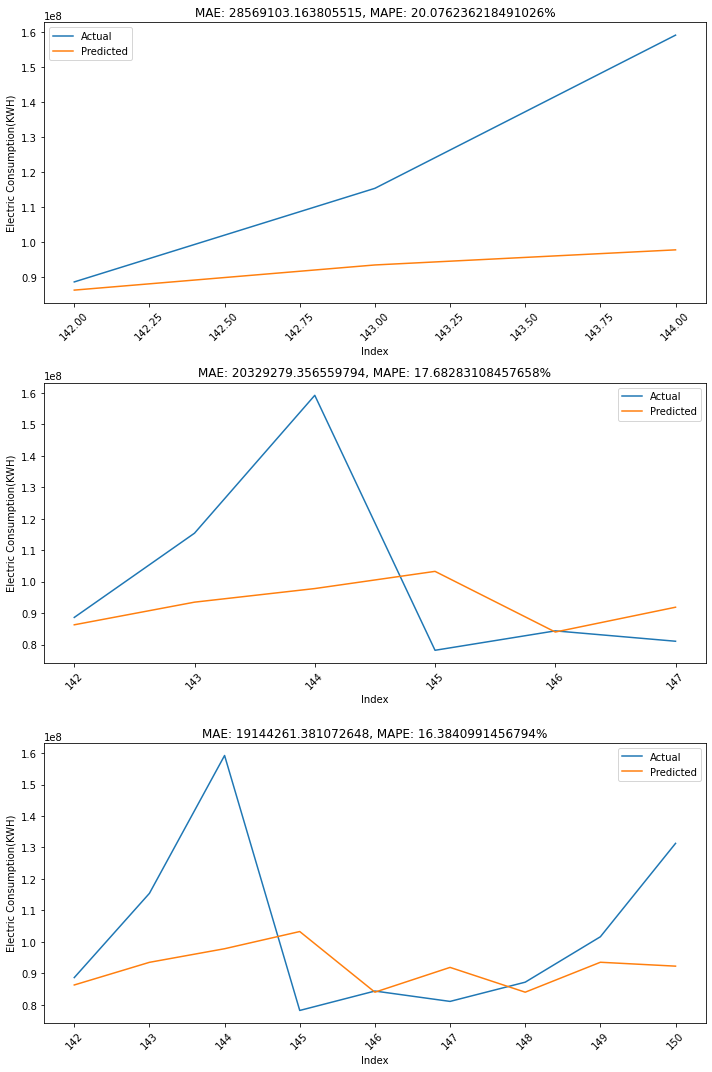

In [66]:
periods = [3,6,9]
fig, axes = plt.subplots(len(periods), 1, figsize=(10,15))

for i, period in enumerate(periods):
    model = XGBRegressor(n_estimators = 100)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test[:period], predictions[:period])
    mape = np.mean(np.abs((y_test[:period] - predictions[:period]) / y_test[:period]))* 100
    print(f"Mean absolute Error: {mae}")
    print(f"Mean absolute perentage Error: {mape}%")
# Plotting the actual and predicted values 
    axes[i].plot(X_test.index[:period], y_test[:period], label = 'Actual')
    axes[i].plot(X_test.index[:period], predictions[:period], label = 'Predicted')
          
#Set titles and labels
    axes[i].set_title(f"MAE: {mae}, MAPE: {mape}%" )
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Electric Consumption(KWH)')
    axes[i].tick_params(axis = 'x', rotation = 45)
    axes[i].legend()
    
plt.tight_layout()
plt.show()

In [67]:
#creating lag for yearly dataset

In [68]:
yearly_data['Consumption_lag1'] = yearly_data['Consumption(KWH)'].shift(1)

In [69]:
#dropping the first row if it still contains NaN after filling
yearly_data.dropna(inplace=True)

In [70]:
yearly_data

,Consumption(KWH),Consumption_lag1
Service Start Date,,
2010,1.310643e+09,2.528582e+07
2011,2.815219e+07,1.310643e+09
2012,1.311111e+09,2.815219e+07
2013,1.290197e+09,1.311111e+09
2014,1.253506e+09,1.290197e+09
2015,1.277355e+09,1.253506e+09
2016,1.291163e+09,1.277355e+09
2017,1.151283e+09,1.291163e+09
2018,2.173791e+07,1.151283e+09


In [71]:
yearly_data_original = yearly_data.reset_index()

In [72]:
yearly_data_original

,Service Start Date,Consumption(KWH),Consumption_lag1
0,2010,1.310643e+09,2.528582e+07
1,2011,2.815219e+07,1.310643e+09
2,2012,1.311111e+09,2.815219e+07
3,2013,1.290197e+09,1.311111e+09
4,2014,1.253506e+09,1.290197e+09
5,2015,1.277355e+09,1.253506e+09
6,2016,1.291163e+09,1.277355e+09
7,2017,1.151283e+09,1.291163e+09
8,2018,2.173791e+07,1.151283e+09
9,2019,1.147120e+09,2.173791e+07


In [73]:
yearly_data_original.drop('Service Start Date', inplace = True, axis = 1)
yearly_data_original.reset_index(inplace = True)
yearly_data_original

,index,Consumption(KWH),Consumption_lag1
0,0,1.310643e+09,2.528582e+07
1,1,2.815219e+07,1.310643e+09
2,2,1.311111e+09,2.815219e+07
3,3,1.290197e+09,1.311111e+09
4,4,1.253506e+09,1.290197e+09
5,5,1.277355e+09,1.253506e+09
6,6,1.291163e+09,1.277355e+09
7,7,1.151283e+09,1.291163e+09
8,8,2.173791e+07,1.151283e+09
9,9,1.147120e+09,2.173791e+07


In [74]:
#define your train and test sets

In [75]:
train = yearly_data_original[:-5]
test = yearly_data_original[-5:]

X_train = train.drop('Consumption(KWH)', axis = 1)
y_train = train['Consumption(KWH)']
X_test = test.drop('Consumption(KWH)', axis = 1)
y_test = test['Consumption(KWH)']

Mean absolute Error: 1320835442.4757419
Mean absolute perentage Error: 98.34580185972325%
Mean absolute Error: 1010235305.8525221
Mean absolute perentage Error: 90.54808095293893%
Mean absolute Error: 1010235305.8525221
Mean absolute perentage Error: 90.54808095293893%


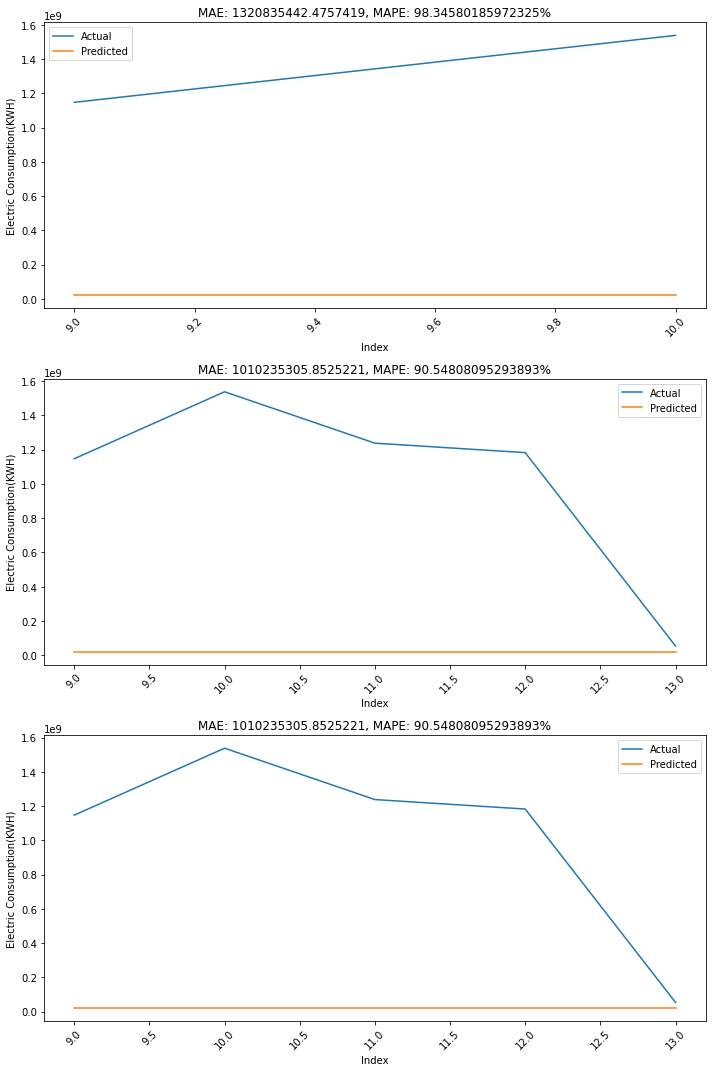

In [76]:
periods = [2, 10, 20]
fig, axes = plt.subplots(len(periods), 1, figsize=(10,15))

for i, period in enumerate(periods):
    model = XGBRegressor(n_estimators = 100)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test[:period], predictions[:period])
    mape = np.mean(np.abs((y_test[:period] - predictions[:period]) / y_test[:period]))* 100
    print(f"Mean absolute Error: {mae}")
    print(f"Mean absolute perentage Error: {mape}%")
# Plotting the actual and predicted values 
    axes[i].plot(X_test.index[:period], y_test[:period], label = 'Actual')
    axes[i].plot(X_test.index[:period], predictions[:period], label = 'Predicted')
          
#Set titles and labels
    axes[i].set_title(f"MAE: {mae}, MAPE: {mape}%" )
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Electric Consumption(KWH)')
    axes[i].tick_params(axis = 'x', rotation = 45)
    axes[i].legend()
    
plt.tight_layout()
plt.show()

In [77]:
#Training and Evaluating xgbregreesor using numeric features extracted using Service Date column

In [78]:
df

,Service Start Date,Consumption(KWH)
0,2009-12-24,3.146217e+06
1,2009-12-25,3.146217e+06
2,2009-12-26,3.146217e+06
3,2009-12-27,3.146217e+06
4,2009-12-28,3.146217e+06
...,...,...
4090,2023-01-26,2.491283e+04
4091,2023-01-27,4.507500e+03
4092,2023-01-28,4.507500e+03
4093,2023-01-29,4.507500e+03


In [79]:
#Time Based Feature Extraction:

In [80]:
df['Day_of_Week'] = df['Service Start Date'].dt.dayofweek
df['Month_of_Year'] = df['Service Start Date'].dt.month
df['Week_of_Year'] = df['Service Start Date'].dt.isocalendar().week
df['Year'] = df['Service Start Date'].dt.year

In [81]:
df

,Service Start Date,Consumption(KWH),Day_of_Week,Month_of_Year,Week_of_Year,Year
0,2009-12-24,3.146217e+06,3,12,52,2009
1,2009-12-25,3.146217e+06,4,12,52,2009
2,2009-12-26,3.146217e+06,5,12,52,2009
3,2009-12-27,3.146217e+06,6,12,52,2009
4,2009-12-28,3.146217e+06,0,12,53,2009
...,...,...,...,...,...,...
4090,2023-01-26,2.491283e+04,3,1,4,2023
4091,2023-01-27,4.507500e+03,4,1,4,2023
4092,2023-01-28,4.507500e+03,5,1,4,2023
4093,2023-01-29,4.507500e+03,6,1,4,2023


In [82]:
df.reset_index(inplace = True)

In [83]:
df

,index,Service Start Date,Consumption(KWH),Day_of_Week,Month_of_Year,Week_of_Year,Year
0,0,2009-12-24,3.146217e+06,3,12,52,2009
1,1,2009-12-25,3.146217e+06,4,12,52,2009
2,2,2009-12-26,3.146217e+06,5,12,52,2009
3,3,2009-12-27,3.146217e+06,6,12,52,2009
4,4,2009-12-28,3.146217e+06,0,12,53,2009
...,...,...,...,...,...,...,...
4090,4090,2023-01-26,2.491283e+04,3,1,4,2023
4091,4091,2023-01-27,4.507500e+03,4,1,4,2023
4092,4092,2023-01-28,4.507500e+03,5,1,4,2023
4093,4093,2023-01-29,4.507500e+03,6,1,4,2023


In [84]:
df.drop(['Service Start Date'], axis = 1, inplace = True)

In [85]:
df

,index,Consumption(KWH),Day_of_Week,Month_of_Year,Week_of_Year,Year
0,0,3.146217e+06,3,12,52,2009
1,1,3.146217e+06,4,12,52,2009
2,2,3.146217e+06,5,12,52,2009
3,3,3.146217e+06,6,12,52,2009
4,4,3.146217e+06,0,12,53,2009
...,...,...,...,...,...,...
4090,4090,2.491283e+04,3,1,4,2023
4091,4091,4.507500e+03,4,1,4,2023
4092,4092,4.507500e+03,5,1,4,2023
4093,4093,4.507500e+03,6,1,4,2023


In [86]:
#define your train and test sets
train = df[:-3065]
test = df[-3065:]

X_train = train.drop('Consumption(KWH)', axis = 1)
y_train = train['Consumption(KWH)']
X_test = test.drop('Consumption(KWH)', axis = 1)
y_test = test['Consumption(KWH)']

Mean absolute Error: 284006.0742763677
Mean absolute perentage Error: 7.800261513962896%
Mean absolute Error: 321268.6071653539
Mean absolute perentage Error: 9.131819467808937%
Mean absolute Error: 356753.74526536773
Mean absolute perentage Error: 9.169129158581402%


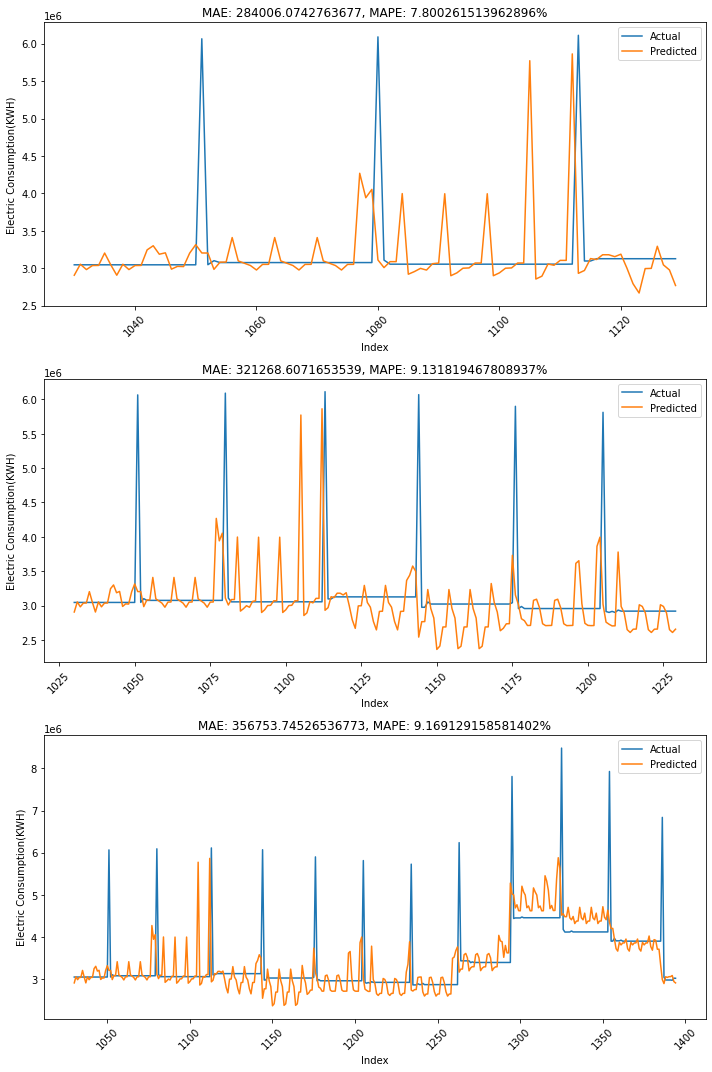

In [87]:
#from xgboost import xgbregressor
periods = [100, 200, 365]
fig, axes = plt.subplots(3, 1, figsize=(10,15))

for i, period in enumerate(periods):
    model = XGBRegressor(n_estimators = 100)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test[:period], predictions[:period])
    mape = np.mean(np.abs((y_test[:period] - predictions[:period]) / y_test[:period]))* 100
    print(f"Mean absolute Error: {mae}")
    print(f"Mean absolute perentage Error: {mape}%")
# Plotting the actual and predicted values 
    axes[i].plot(X_test.index[:period], y_test[:period], label = 'Actual')
    axes[i].plot(X_test.index[:period], predictions[:period], label = 'Predicted')
          
#Set titles and labels
    axes[i].set_title(f"MAE: {mae}, MAPE: {mape}%" )
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Electric Consumption(KWH)')
    axes[i].tick_params(axis = 'x', rotation = 45)
    axes[i].legend()

mae2 = mae
mape2 = mape
    
plt.tight_layout()
plt.show()

In [88]:
#adding external factor temperature
df_temp

,Service Start Date,Consumption(KWH)
0,2009-12-24,3.146217e+06
1,2009-12-25,3.146217e+06
2,2009-12-26,3.146217e+06
3,2009-12-27,3.146217e+06
4,2009-12-28,3.146217e+06
...,...,...
4090,2023-01-26,2.491283e+04
4091,2023-01-27,4.507500e+03
4092,2023-01-28,4.507500e+03
4093,2023-01-29,4.507500e+03


In [89]:
#time based feature extraction:
df_temp['Day_of_Week'] = df_temp['Service Start Date'].dt.dayofweek
df_temp['Month_of_Year'] = df_temp['Service Start Date'].dt.month
df_temp['Week_of_Year'] = df_temp['Service Start Date'].dt.isocalendar().week
df_temp['Year']=df_temp['Service Start Date'].dt.year

In [90]:
df_temp

,Service Start Date,Consumption(KWH),Day_of_Week,Month_of_Year,Week_of_Year,Year
0,2009-12-24,3.146217e+06,3,12,52,2009
1,2009-12-25,3.146217e+06,4,12,52,2009
2,2009-12-26,3.146217e+06,5,12,52,2009
3,2009-12-27,3.146217e+06,6,12,52,2009
4,2009-12-28,3.146217e+06,0,12,53,2009
...,...,...,...,...,...,...
4090,2023-01-26,2.491283e+04,3,1,4,2023
4091,2023-01-27,4.507500e+03,4,1,4,2023
4092,2023-01-28,4.507500e+03,5,1,4,2023
4093,2023-01-29,4.507500e+03,6,1,4,2023


In [91]:
df_temp.set_index('Service Start Date', inplace = True)

In [92]:
df_temp

,Consumption(KWH),Day_of_Week,Month_of_Year,Week_of_Year,Year
Service Start Date,,,,,
2009-12-24,3.146217e+06,3,12,52,2009
2009-12-25,3.146217e+06,4,12,52,2009
2009-12-26,3.146217e+06,5,12,52,2009
2009-12-27,3.146217e+06,6,12,52,2009
2009-12-28,3.146217e+06,0,12,53,2009
...,...,...,...,...,...
2023-01-26,2.491283e+04,3,1,4,2023
2023-01-27,4.507500e+03,4,1,4,2023
2023-01-28,4.507500e+03,5,1,4,2023


In [93]:
#incorporating external factors

In [94]:
nyc_temp = pd.read_csv('3548781.csv')
nyc_temp = nyc_temp[['DATE','TMAX']]

In [95]:
#Renaming the columns to match the date field in the weather data with the energy consumption data to merge easily

In [96]:
nyc_temp.rename(columns={'DATE':'Service Start Date','TMAX':"Temperature"},inplace = True)

In [97]:
nyc_temp['Service Start Date'] = pd.to_datetime(nyc_temp['Service Start Date'])

In [98]:
nyc_temp.set_index('Service Start Date', inplace = True)

In [99]:
nyc_temp

,Temperature
Service Start Date,
2009-12-24,38
2009-12-25,40
2009-12-26,52
2009-12-27,54
2009-12-28,44
...,...
2023-01-26,52
2023-01-27,43
2023-01-28,53


In [100]:
nyc_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4786 entries, 2009-12-24 to 2023-01-30
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temperature  4786 non-null   int64
dtypes: int64(1)
memory usage: 74.8 KB


In [101]:
#Adding the temperature factor to the energy consumption dataframe

In [102]:
df_temp = pd.merge(df_temp, nyc_temp[['Temperature']], on= 'Service Start Date', how = 'inner')

In [103]:
df_temp

,Consumption(KWH),Day_of_Week,Month_of_Year,Week_of_Year,Year,Temperature
Service Start Date,,,,,,
2009-12-24,3.146217e+06,3,12,52,2009,38
2009-12-25,3.146217e+06,4,12,52,2009,40
2009-12-26,3.146217e+06,5,12,52,2009,52
2009-12-27,3.146217e+06,6,12,52,2009,54
2009-12-28,3.146217e+06,0,12,53,2009,44
...,...,...,...,...,...,...
2023-01-26,2.491283e+04,3,1,4,2023,52
2023-01-27,4.507500e+03,4,1,4,2023,43
2023-01-28,4.507500e+03,5,1,4,2023,53


In [104]:
df_temp.reset_index(inplace = True)

In [105]:
df_temp

,Service Start Date,Consumption(KWH),Day_of_Week,Month_of_Year,Week_of_Year,Year,Temperature
0,2009-12-24,3.146217e+06,3,12,52,2009,38
1,2009-12-25,3.146217e+06,4,12,52,2009,40
2,2009-12-26,3.146217e+06,5,12,52,2009,52
3,2009-12-27,3.146217e+06,6,12,52,2009,54
4,2009-12-28,3.146217e+06,0,12,53,2009,44
...,...,...,...,...,...,...,...
4090,2023-01-26,2.491283e+04,3,1,4,2023,52
4091,2023-01-27,4.507500e+03,4,1,4,2023,43
4092,2023-01-28,4.507500e+03,5,1,4,2023,53
4093,2023-01-29,4.507500e+03,6,1,4,2023,47


In [106]:
df_temp.drop('Service Start Date',inplace=True, axis=1)

In [107]:
df_temp.reset_index(inplace = True)

In [108]:
df_temp

,index,Consumption(KWH),Day_of_Week,Month_of_Year,Week_of_Year,Year,Temperature
0,0,3.146217e+06,3,12,52,2009,38
1,1,3.146217e+06,4,12,52,2009,40
2,2,3.146217e+06,5,12,52,2009,52
3,3,3.146217e+06,6,12,52,2009,54
4,4,3.146217e+06,0,12,53,2009,44
...,...,...,...,...,...,...,...
4090,4090,2.491283e+04,3,1,4,2023,52
4091,4091,4.507500e+03,4,1,4,2023,43
4092,4092,4.507500e+03,5,1,4,2023,53
4093,4093,4.507500e+03,6,1,4,2023,47


In [109]:
#define your train and test sets
train = df[:-3325]
test = df[-3325:]

X_train = train.drop('Consumption(KWH)', axis = 1)
y_train = train['Consumption(KWH)']
X_test = test.drop('Consumption(KWH)', axis = 1)
y_test = test['Consumption(KWH)']

Mean absolute Error: 272377.14802850765
Mean absolute perentage Error: 7.2311905916466%
Mean absolute Error: 444767.90562407166
Mean absolute perentage Error: 10.447329878710635%
Mean absolute Error: 412256.4894338236
Mean absolute perentage Error: 10.085859986036532%


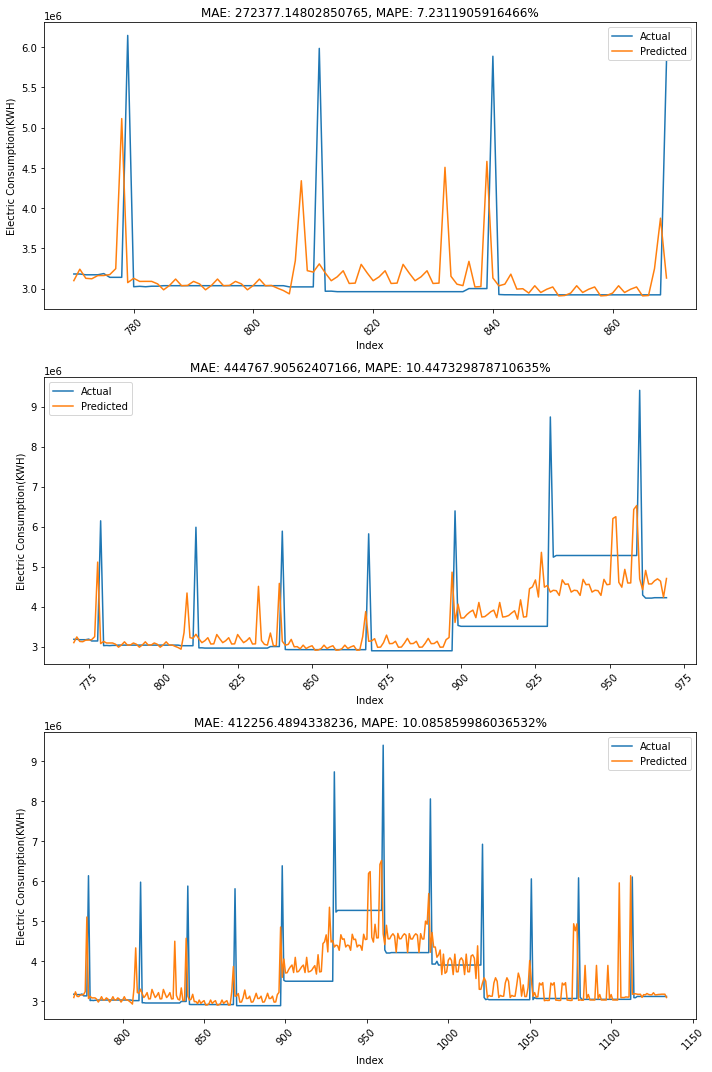

In [110]:
#from xgboost import xgbregressor
periods = [100, 200, 365]
fig, axes = plt.subplots(3, 1, figsize=(10,15))

for i, period in enumerate(periods):
    model = XGBRegressor(n_estimators = 100)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test[:period], predictions[:period])
    mape = np.mean(np.abs((y_test[:period] - predictions[:period]) / y_test))* 100
    print(f"Mean absolute Error: {mae}")
    print(f"Mean absolute perentage Error: {mape}%")
# Plotting the actual and predicted values 
    axes[i].plot(X_test.index[:period], y_test[:period], label = 'Actual')
    axes[i].plot(X_test.index[:period], predictions[:period], label = 'Predicted')
          
#Set titles and labels
    axes[i].set_title(f"MAE: {mae}, MAPE: {mape}%" )
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Electric Consumption(KWH)')
    axes[i].tick_params(axis = 'x', rotation = 45)
    axes[i].legend()
    
mae3 = mae
mape3 = mape

plt.tight_layout()
plt.show()

In [111]:
#plot()

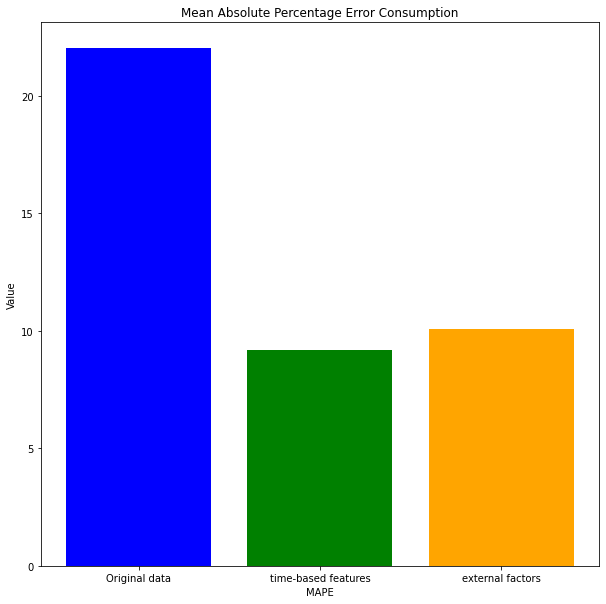

In [112]:
plt.figure(figsize = (10,10))
plt.bar(['Original data','time-based features','external factors'], [mape1, mape2, mape3], color=['blue', 'green', 'orange'])
plt.title('Mean Absolute Percentage Error Consumption')
plt.xlabel('MAPE')
plt.ylabel('Value')
plt.show()

#The model performs well with the lag feature for consumption.If we added time based features/ external factor, then we are unable to see better model performance. When compared to FBProphet, XGBoost Regressor is better in understanding and following the pattern for energy consumption for this particular dataset.